# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

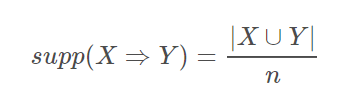

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

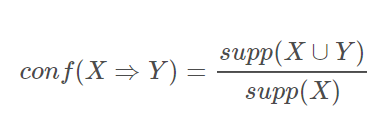

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
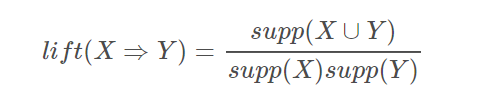



---



# **Groceries Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data Groceries data.csv yang bisa temen-temen download [disini](https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba?select=Groceries+data.csv)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
df = pd.read_csv('/content/Groceries data.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-15,tropical fruit
1,2552,01-05-15,whole milk
2,2300,19-09-15,pip fruit
3,1187,12-12-15,other vegetables
4,3037,02-01-15,whole milk
...,...,...,...
38760,4471,10-08-14,sliced cheese
38761,2022,23-02-14,candy
38762,1097,16-04-14,cake bar
38763,1510,12-03-14,fruit/vegetable juice


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 38765 baris dan 3 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Member_number      Date   itemDescription
0           1808  21-07-15    tropical fruit
1           2552  01-05-15        whole milk
2           2300  19-09-15         pip fruit
3           1187  12-12-15  other vegetables
4           3037  02-01-15        whole milk
5           4941  14-02-15        rolls/buns
6           4501  05-08-15  other vegetables
7           3803  23-12-15        pot plants
8           2762  20-03-15        whole milk
9           4119  02-12-15    tropical fruit


In [ ]:
print('Unique itemDescription: ', df['itemDescription'].nunique())

Unique itemDescription:  167


In [ ]:
#Mencetak data itemDescription yang unik (memiliki nilai itemDescription berbeda)
print('Unique itemDescription: ', df['itemDescription'].nunique())
print( '\n', df['itemDescription'].unique())

Unique itemDescription:  167

 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whippe

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Member_number      0
Date               0
itemDescription    0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [ ]:
# cek nilai "NONE" pada kolom itemDescription
print(df[df['itemDescription']=='NONE'])

Empty DataFrame
Columns: [Member_number, Date, itemDescription]
Index: []


Tidak terdapat nilai 'NONE' di dataset kita.

Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   Year             38765 non-null  object
 4   Month            38765 non-null  object
 5   Day              38765 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB
None
   Member_number      Date   itemDescription Year Month Day
0           1808  21-07-15    tropical fruit   21    07  15
1           2552  01-05-15        whole milk   01    05  15
2           2300  19-09-15         pip fruit   19    09  15
3           1187  12-12-15  other vegetables   12    12  15
4           3037  02-01-15        whole milk   02    01  15


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 01/01/2014 hingga 30/12/2015. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
# Mencetak 20 data penjualan itemDescription terbanyak
most_sold = df['itemDescription'].value_counts().head(20)

print('Most Sold itemDescription: \n')
print(most_sold)

Most Sold itemDescription: 

whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: itemDescription, dtype: int64


In [ ]:
transaction_count = df.groupby(by='itemDescription')[['Member_number']].count().sort_values(by='Member_number', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Member_number
itemDescription,
whole milk,6.454276
other vegetables,4.896169
rolls/buns,4.426674
soda,3.905585
yogurt,3.441249


Text(0.5, 1.0, 'itemDescription Most Sold')

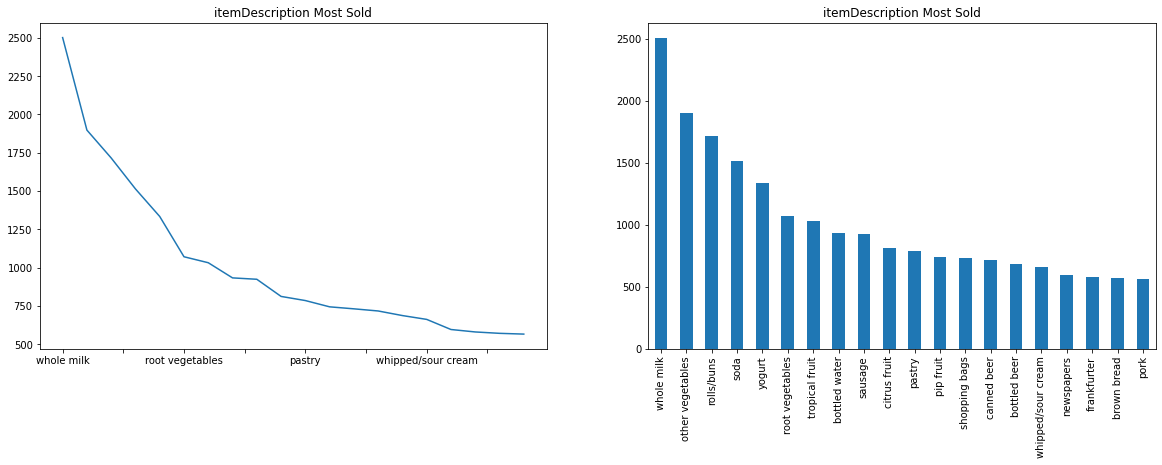

In [ ]:
# visualisasikan data penjualan itemDescription terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('itemDescription Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('itemDescription Most Sold')

Berdasarkan hasil visualisasi, whole milk adalah barang yang paling banyak terjual, diikuti oleh other vegetables, rolls/buns, soda, dan yogurt. Ini masuk akal untuk toko groceries. Sekarang setelah kita mengetahui item mana yang paling populer, mari kita lihat bulan mana yang menghasilkan penjualan paling banyak.

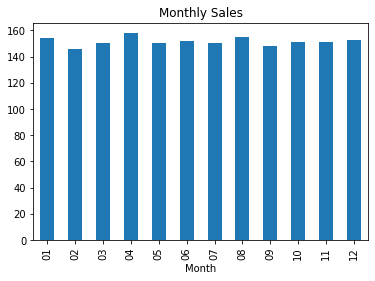

In [ ]:
df.groupby('Month')['itemDescription'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

Data penjualan per bulan cenderung sama dan tidak ada outlier.

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    2
02    2
03    2
04    2
05    2
06    2
07    2
08    2
09    2
10    2
11    2
12    2
Name: Day, dtype: int64


Pada semua bulan tercatat penjualan yang sama yaitu 2 hari.

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi atau Member_number dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar 

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Member_number'].unique():
    tlist = list(set(df[df['Member_number']==i]['itemDescription']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

3898


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu bahan makanan dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
15177,"(other vegetables, sausage, whole milk)","(rolls/buns, yogurt)",0.013597,0.270408,2.428689
15192,"(rolls/buns, yogurt)","(other vegetables, sausage, whole milk)",0.013597,0.122120,2.428689
15181,"(rolls/buns, other vegetables, yogurt)","(sausage, whole milk)",0.013597,0.259804,2.428575
15188,"(sausage, whole milk)","(rolls/buns, other vegetables, yogurt)",0.013597,0.127098,2.428575
12800,"(yogurt, curd)","(sausage, whole milk)",0.010005,0.248408,2.322046
...,...,...,...,...,...
7643,(soda),"(other vegetables, frozen vegetables)",0.014366,0.045827,1.003549
984,(cream cheese ),(pip fruit),0.015136,0.171014,1.002428
985,(pip fruit),(cream cheese ),0.015136,0.088722,1.002428
476,(brown bread),(whipped/sour cream),0.021036,0.154717,1.000144


# **Kesimpulan**

Berdasarkan analisa hasil yang telah dilakukan, didapatkan 
kesimpulan sebagai berikut:
1. Semakin tinggi nilai suatu lift yang didapatkan menggunakan metode market basket analysis oleh algoritma apriori, maka semakin kuat hubungan antar item barang yang dijual. Data dengan jelas menunjukkan bahwa whole milk adalah bahan makanan yang paling banyak terjual. 
2. Adanya hubungan pada item Antecedent (IF) yang dibeli pelanggan, maka kemungkinan item Consequent (THEN) diambil oleh pelanggan dengan ID pelanggan yang sama juga.
3. Bisnis selalu mencari cara untuk mengoptimalkan pengaturan dan meningkatkan penjualan. Oleh karena sekarang sudah mengetahui pola hubungan antara barang dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan strategi pemasaran berdasarkan penelitian ini. Misalnya, toko groceries mungkin tertarik untuk mengadakan promosi barang gratis, mengingat kemungkinan besar item lain dijual sebagai hasilnya (misalkan, jika mereka mengadakan promo buy 1 get 1 khusus special event, itu mungkin tidak hanya menarik pelanggan baru yang sering datang, tetapi juga ada peluang yang sangat bagus bahwa pelanggan masih akan menghabiskan uang untuk whole milk).





# **Saran**

Berdasarkan kesimpulan yang telah diuraikan, maka ada beberapa saran yang 
dapat di sampaikan yaitu:
1. Perencanaan strategi penataan dan penempatan bahan makanan sesuai dengan hasil analisis yang berkaitan dengan produk-produk yang sering dibeli bersamaan.
2. Diadakannya promo dengan pembelian barang yang sering dibeli dengan barang lainnya yang tidak memiliki hubungan agar barang yang tidak memiliki hubungan tersebut juga dapat cepat terjual habis.
3. Pemasangan iklan seperti brosur, spanduk, dan lain-lain dengan menampilkan produk-produk yang sering dibeli oleh konsumen.






